## **[Objectif: Maîtriser SQL]()** 
#### Le projet de cette semaine porte sur le SQL et la manipulation des bases des données relationnelles
#### Date de soumission: jeudi 15 juin 2023 à 22 H


##### Nous travaillerons dans cette partie avec une base des données du championnat de baskett ball américain (NBA)
##### Cette base est au format compressé et disponible publiquement dans kaggle et  accessible à l'adresse:
- [baskettball_data (url)](https://drive.google.com/file/d/17T1SQdChPn6JTpdLnd8VGWSOVGeWCL6W/view?usp=sharing)
- Vous devez obtenir une version décompresser directement dans votre environement de travail ou dans votre disque local

##### Use this screen shot from stack Exchange to download the notebook in your personnel computer
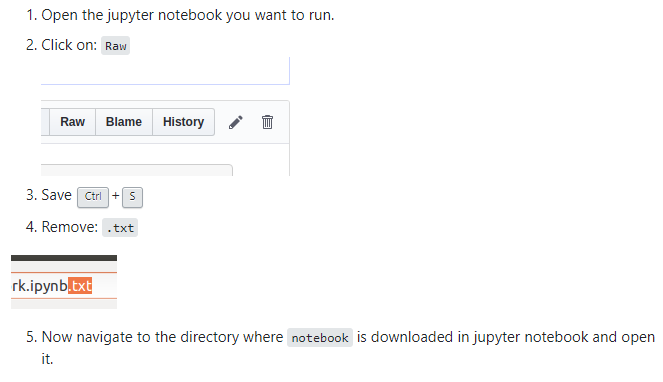
###### complementary notes
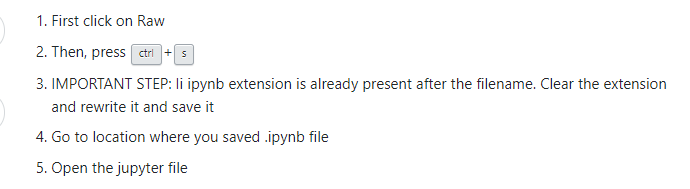

##### `Importer les librairies necéssaires pour travailler avec une application de gestion SQL avec python (sqlite3)`

In [81]:
import sqlite3
import pandas as pd

**Tâche 1.1:** Initialiser sqlite3 et accéder à la base des données

In [5]:
## Vous devez modifier la séquence suivante (Users/DDD/Downloads/basketball.sqlite/basketball.sqlite) 
# en fonction de la localisation du fichier dans votre ordinateur
%load_ext sql
%sql sqlite:////Users/DDD/Downloads/basketball.sqlite/basketball.sqlite 

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


**Tâche 1.2:** Faire votre première réquête dans la base en affichant son contenu
- [SQL: exposé de compréhension](https://www.i3s.unice.fr/~edemaria/cours/c4.pdf)
- [SQL: bases et fonctions](https://fxjollois.github.io/cours-sql/)
- Pour communiquer avec sqlite, chaque cellule de codes de jupyter doit commencer par '%%sql'

##### Utiliser la fonction SELECT  pour avoir accés aux informations et tables de la base

In [12]:
%%sql

SELECT *
FROM sqlite_schema

 * sqlite:////Users/DDD/Downloads/basketball.sqlite/basketball.sqlite
Done.


type,name,tbl_name,rootpage,sql
table,Player,Player,2,"CREATE TABLE ""Player"" (""id"" TEXT, ""full_name"" TEXT, ""first_name"" TEXT, ""last_name"" TEXT, ""is_active"" INTEGER)"
table,Team,Team,4,"CREATE TABLE ""Team"" (""id"" TEXT, ""full_name"" TEXT, ""abbreviation"" TEXT, ""nickname"" TEXT, ""city"" TEXT, ""state"" TEXT, ""year_founded"" INTEGER)"
table,Team_Attributes,Team_Attributes,5,"CREATE TABLE ""Team_Attributes"" (""ID"" TEXT, ""ABBREVIATION"" TEXT, ""NICKNAME"" TEXT, ""YEARFOUNDED"" TEXT, ""CITY"" TEXT, ""ARENA"" TEXT, ""ARENACAPACITY"" REAL, ""OWNER"" TEXT, ""GENERALMANAGER"" TEXT, ""HEADCOACH"" TEXT, ""DLEAGUEAFFILIATION"" TEXT, ""FACEBOOK_WEBSITE_LINK"" TEXT, ""INSTAGRAM_WEBSITE_LINK"" TEXT, ""TWITTER_WEBSITE_LINK"" TEXT)"
table,Team_History,Team_History,6,"CREATE TABLE ""Team_History"" (""ID"" TEXT, ""CITY"" TEXT, ""NICKNAME"" TEXT, ""YEARFOUNDED"" TEXT, ""YEARACTIVETILL"" TEXT)"
table,Player_Attributes,Player_Attributes,15,"CREATE TABLE ""Player_Attributes"" (""ID"" TEXT, ""FIRST_NAME"" TEXT, ""LAST_NAME"" TEXT, ""DISPLAY_FIRST_LAST"" TEXT, ""DISPLAY_LAST_COMMA_FIRST"" TEXT, ""DISPLAY_FI_LAST"" TEXT, ""PLAYER_SLUG"" TEXT, ""BIRTHDATE"" TEXT, ""SCHOOL"" TEXT, ""COUNTRY"" TEXT, ""LAST_AFFILIATION"" TEXT, ""HEIGHT"" REAL, ""WEIGHT"" REAL, ""SEASON_EXP"" INTEGER, ""JERSEY"" TEXT, ""POSITION"" TEXT, ""ROSTERSTATUS"" TEXT, ""GAMES_PLAYED_CURRENT_SEASON_FLAG"" TEXT, ""TEAM_ID"" TEXT, ""TEAM_NAME"" TEXT, ""TEAM_ABBREVIATION"" TEXT, ""TEAM_CODE"" TEXT, ""TEAM_CITY"" TEXT, ""PLAYERCODE"" TEXT, ""FROM_YEAR"" TEXT, ""TO_YEAR"" TEXT, ""DLEAGUE_FLAG"" TEXT, ""NBA_FLAG"" TEXT, ""GAMES_PLAYED_FLAG"" TEXT, ""DRAFT_YEAR"" TEXT, ""DRAFT_ROUND"" TEXT, ""DRAFT_NUMBER"" TEXT, ""PTS"" REAL, ""AST"" REAL, ""REB"" REAL, ""ALL_STAR_APPEARANCES"" REAL, ""PIE"" REAL)"
table,Game_Officials,Game_Officials,8375,"CREATE TABLE ""Game_Officials"" (""OFFICIAL_ID"" TEXT, ""FIRST_NAME"" TEXT, ""LAST_NAME"" TEXT, ""JERSEY_NUM"" TEXT, ""GAME_ID"" TEXT)"
table,Game_Inactive_Players,Game_Inactive_Players,8997,"CREATE TABLE ""Game_Inactive_Players"" (""PLAYER_ID"" TEXT, ""FIRST_NAME"" TEXT, ""LAST_NAME"" TEXT, ""JERSEY_NUM"" TEXT, ""TEAM_ID"" TEXT, ""TEAM_CITY"" TEXT, ""TEAM_NAME"" TEXT, ""TEAM_ABBREVIATION"" TEXT, ""GAME_ID"" TEXT)"
table,Team_Salary,Team_Salary,13415,"CREATE TABLE `Team_Salary` ( `nameTeam` TEXT, `slugTeam` TEXT, `urlTeamSalaryHoopsHype` TEXT, `X2020-21` REAL, `X2021-22` REAL, `X2022-23` REAL, `X2023-24` REAL, `X2024-25` REAL, `X2025-26` REAL)"
table,Player_Salary,Player_Salary,23558,"CREATE TABLE `Player_Salary` ( `slugSeason` TEXT, `nameTeam` TEXT, `namePlayer` TEXT, `statusPlayer` TEXT, `isFinalSeason` INTEGER, `isWaived` INTEGER, `isOnRoster` INTEGER, `isNonGuaranteed` INTEGER, `isTeamOption` INTEGER, `isPlayerOption` INTEGER, `typeContractDetail` TEXT, `value` REAL)"
table,Draft,Draft,23559,"CREATE TABLE `Draft` ( `yearDraft` REAL, `numberPickOverall` REAL, `numberRound` REAL, `numberRoundPick` REAL, `namePlayer` TEXT, `slugTeam` TEXT, `nameOrganizationFrom` TEXT, `typeOrganizationFrom` TEXT, `idPlayer` REAL, `idTeam` REAL, `nameTeam` TEXT, `cityTeam` TEXT, `teamName` TEXT, `PLAYER_PROFILE_FLAG` REAL, `slugOrganizationTypeFrom` TEXT, `locationOrganizationFrom` TEXT)"


##### Cette table contient l'arborescence des tables et des informations contenues dans ces tables relationnelles

**Task 1.3:** Selectionner toutes les tables de la base
- Compléter le code ci-dessous en utilisant la fonction 'WHERE'
- [SQLite tutorial](https://www.sqlitetutorial.net/sqlite-select/)

In [ ]:
%%sql
SELECT  name 
FROM sqlite_schema
WHERE ...

**Task 1.4:** Select all columns from the `Player` table and from `Player_salary`, limiting your results to the first five rows. Use two separate cells to execute your code
- [SQL: bases et fonctions](https://fxjollois.github.io/cours-sql/)

In [ ]:
%%sql
SELECT *
FROM ...
lIMIT ...

In [ ]:
%%sql
...
FROM Player_salary
lIMIT ...

**Task 1.5:** How many observations are in the `Player` table? Use the `count` command to find out. You should find no more than 4501 observations
- [SQL count](https://www.sqlitetutorial.net/sqlite-count-function/)


In [ ]:
%%sql
SELECT ...
FROM Player

**Task 1.6:** Select all columns from the `Team` table, limiting your results to the first five rows. Use `SELECT` and `LIMIT` functions
- [SQL: bases et fonctions](https://fxjollois.github.io/cours-sql/)

In [22]:
%%sql
...

 * sqlite:////Users/DDD/Downloads/basketball.sqlite/basketball.sqlite
Done.


id,full_name,abbreviation,nickname,city,state,year_founded
1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


**Task 1.7:** What cities are represented in the `Team` table? Use the `distinct` command to determine the unique values in the **`city** column.
- [SQL: bases et fonctions](https://fxjollois.github.io/cours-sql/)

In [ ]:
%%sql
SELECT...
...

**Task 1.8:** How many cities are there in `Team` table? Combine the `count` and `distinct` commands to calculate the number of unique values in **`Team`**.

In [26]:
%%sql
...count(distinct(city))
FROM team


 * sqlite:////Users/DDD/Downloads/basketball.sqlite/basketball.sqlite
Done.


count(distinct(city))
29


**Task 1.9:** For our model, we'll focus on slugSeason `2020-21`. Select all columns that from `Player_Salary`, showing only rows where the **`slugSeason`** is `2020-21` and limiting your results to the first thre rows.

In [99]:
%%sql
...

 * sqlite:////Users/DDD/Downloads/basketball.sqlite/basketball.sqlite


**Task 1.10:** How many unique salary values do you have in the table create above? 
Remember that this table concerns only season 2020-21. Yous should have no more than 523 individuals salary.

In [ ]:
%%sql
...

**Task 1.11:** Copy and rename table and column in tha table. Use `ALTER` and `RENAME` functions.
You should first alter the name of the table as `salary_full_name` then rename `namePlayer` column as `full_name`.
`full_name` is the name of players in table `Player`.
- [RENAME FUNCTION](https://www.sqlitetutorial.net/sqlite-rename-column/)

In [ ]:
%%sql
ALTER TABLE ...
RENAME TO ...

In [ ]:
%%sql
...
RENAME COLUMN ...

##### Show here 5 rows of new table

In [ ]:
%%sql
...

**Task .1.12:** Use the `distinct` command to create a column with all unique full_name in the `salary_full_name` table (the one you just created). `JOIN` this column with all the columns from the `Player` table, showing only Season where slugSeason is **2020-21**  and limiting your results to the first five rows of the new table
- [JOIN in SQLite](https://www.sqlitetutorial.net/sqlite-join/)

In [ ]:
%%sql
SELECT *
FROM salary_full_name AS s
JOIN Player ...
WHERE slugSeason= ...
LIMIT 5

##### Now you have 2 columns with full_name: full_name and full_name_1. We should rename full_name_1 as name

In [ ]:
%%sql
...

**Task 1.13:** Put your the SQL query you have used to combine tables into a string and assign it to the variable `query`.

In [ ]:
query = """ ...

"""
print(query)

**Task 1.14:** Use the [`connect`](https://docs.python.org/3/library/sqlite3.html#sqlite3.connect) method from the sqlite3 library to connect to the database. Remember that you should specify the url of your database.
- [Connection to a SQL database using sqlite3</span></span>.](../%40textbook/10-databases-sql.ipynb#Using-pandas-with-SQL-Databases)

In [ ]:
conn = sqlite3.connect("THE PATH TO YOUR sqlite BASKETBALL DATABASE")

**Task 1.15:** Use the [`read_sql`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html#pandas-read-sql) from the pandas library to create a DataFrame from your `query`. Be sure that the **`full_name`** is set as your index column. You should not limit your query. 

In [95]:
import pandas as pd

df = pd.read_sql(query, conn, index_col= ...)

df.head()

,name,slugSeason,nameTeam,statusPlayer,isFinalSeason,isWaived,isOnRoster,isNonGuaranteed,isTeamOption,isPlayerOption,typeContractDetail,value
full_name,,,,,,,,,,,,
Bogdan Bogdanovic,Bogdan Bogdanovic,2020-21,Atlanta Hawks,current roster,0,0,1,0,0,0,Guaranteed,18000000.0
Brandon Goodwin,Brandon Goodwin,2020-21,Atlanta Hawks,current roster,0,0,1,0,0,0,Guaranteed,1701593.0
Bruno Fernando,Bruno Fernando,2020-21,Atlanta Hawks,current roster,0,0,1,0,0,0,Guaranteed,1517981.0
Cam Reddish,Cam Reddish,2020-21,Atlanta Hawks,current roster,0,0,1,0,0,0,Guaranteed,4458000.0
Clint Capela,Clint Capela,2020-21,Atlanta Hawks,current roster,0,0,1,0,0,0,Guaranteed,16000000.0


In [96]:
df.shape

(419, 12)

In [97]:
df["value"].describe()

count    4.190000e+02
mean     8.128092e+06
std      9.702137e+06
min      5.000000e+04
25%      1.620564e+06
50%      3.872215e+06
75%      1.086595e+07
max      4.300636e+07
Name: value, dtype: float64